In [1]:
import pandas as pd

df = pd.read_csv('wildfire/ca_daily_fire_2000_2021.csv')
min_lat = df['latitude'].min()
max_lat = df['latitude'].max()
min_long = df['longitude'].min()
max_long = df['longitude'].max()
print(min_lat)
print(max_lat)
print(min_long)
print(max_long)

32.436893
41.999973
-123.9997
-114.0001


# Data Preprocessing

In [ ]:
import os
import pandas as pd

#top left 41.99643654115538, -124.4306682727843
#bottom right 32.45837506475717, -114.11437488552508
for (root,dirs,files) in os.walk('csv_gsod/',topdown=True):
  # print("Directory path: %s"%root)
  # print("Directory Names: %s"%dirs)
  # print("Files Names: %s"%files) 
  if not dirs:
    for file in files:
      path = os.path.join(root, file)
      df = pd.read_csv(path, nrows=1) 
      name = df['NAME'][0]
      lat = df['LATITUDE']
      long = df['LONGITUDE'] 
      if type(name)!= str and (lat.isna().any() or long.isna().any()):
        os.remove(path)
        continue
      if not name.endswith('US'):
        os.remove(path)
        continue
      if lat[0] < 32.45837506475717 or lat[0] > 41.99643654115538:
        os.remove(path)
        continue
      if long[0] < -124.4306682727843 or long[0] > -114.11437488552508:
        os.remove(path)
        continue

# Create single dataframe for analysis

In [1]:
import pandas as pd
import os

li = []
i = 0
for (root,dirs,files) in os.walk('csv_gsod/',topdown=True):
  if not dirs:
    for file in files:
      path = os.path.join(root, file)
      df = pd.read_csv(path, index_col=None, header=0)
      li.append(df)
    # break

frame = pd.concat(li, axis=0, ignore_index=True)
frame['SNDP'] = frame['SNDP'].replace(999.9, 0)
frame = frame.replace(9999.9, pd.NA)
frame = frame.replace(999.9, pd.NA)
frame.fillna(method='ffill', inplace=True)
frame.dropna(inplace=True)

/tmp/ipykernel_1429144/2309916765.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  frame.fillna(method='ffill', inplace=True)
/tmp/ipykernel_1429144/2309916765.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  frame.fillna(method='ffill', inplace=True)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.neighbors import BallTree

df = frame

features = [
    'TEMP', 'DEWP', 'SLP',
    'STP', 'VISIB', 'WDSP',
    'MXSPD', 'GUST', 'MAX',
    'MIN', 'PRCP', #'SNDP',
    # 'FRSHTT'
]

# Normalize 
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

X = df[features]

In [ ]:
# umap_model = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, metric='euclidean', random_state=42)
umap_model = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, metric='euclidean')
X_umap = umap_model.fit_transform(X)

/home/haoye/Source/4502-project/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, metric='euclidean', min_samples=10,cluster_selection_epsilon=0.1)
labels = clusterer.fit_predict(X_umap)
X['cluster'] = labels

/home/haoye/Source/4502-project/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/haoye/Source/4502-project/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/tmp/ipykernel_1429144/819243802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = labels


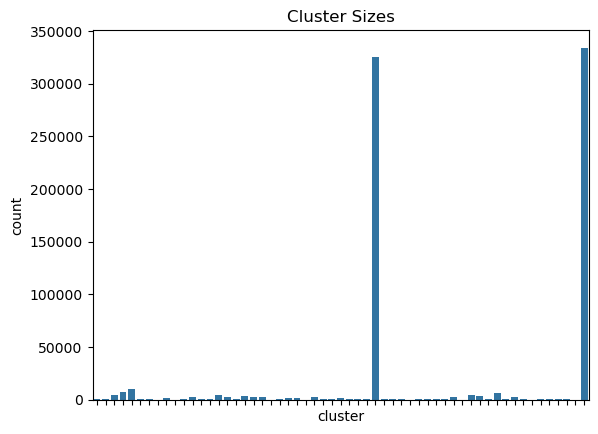

In [41]:
plot = sns.countplot(x='cluster', data=X)
plt.title("Cluster Sizes")
plt.setp(plot.axes.get_xticklabels(), visible=False)
plt.setp(plot.axes.get_xticklabels()[::1], visible=True)
plt.show()

In [50]:
X['cluster'].value_counts(ascending=False)

cluster
 55    334137
 31    325216
 3      10062
 2       7500
 45      6659
 13      4710
 1       4402
 42      4215
 16      3254
 43      3140
 18      2887
 40      2818
 14      2796
 10      2371
 24      2341
 47      2163
 17      2141
 21      1808
 22      1671
 27      1554
 7       1049
 50       986
 15       857
 11       734
 52       712
 9        649
 20       592
 53       467
 29       415
 37       402
-1        379
 5        377
 48       359
 34       344
 46       325
 44       313
 28       276
 25       265
 38       213
 0        203
 32       192
 12       190
 26       186
 36       177
 4        139
 39       123
 33       109
 30        90
 51        81
 41        75
 19        74
 54        53
 23        47
 49        46
 8         38
 6         34
 35        30
Name: count, dtype: int64

In [ ]:
from sklearn.neighbors import BallTree
fire_tree = BallTree(np.radians(fire_df[['latitude', 'longitude']]), metric='haversine')

/home/haoye/Source/4502-project/.pixi/envs/default/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


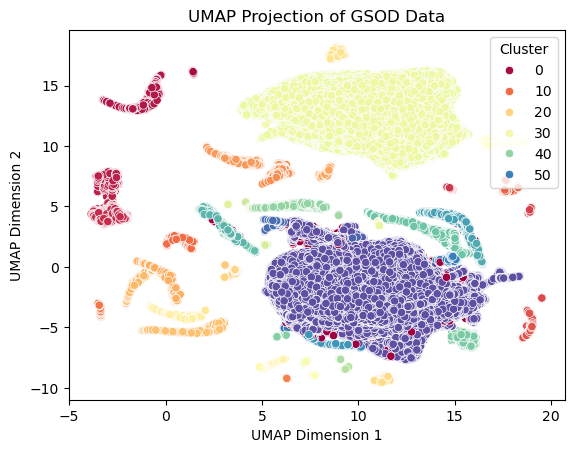

In [ ]:
def plot_umap_clusters(embedding, cluster_labels):
    plt.figure()
    sns.scatterplot(
        x=embedding[:, 0], y=embedding[:, 1],
        hue=cluster_labels, palette='Spectral',
    )
    plt.title("UMAP Projection of GSOD Data")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend(title='Cluster')
    plt.show()

plot_umap_clusters(X_umap, labels)

In [ ]:
v = weather_df.value_counts('cluster')
v.min()

np.int64(30)

In [15]:
def cluster_fire_stats(weather_df, fire_df, radius_km=25, days=3):
    cluster_stats = {}
    earth_radius_km = 6371
    i = 0
    for c in np.unique(weather_df['cluster']):
        if c == -1:
            continue  # skip noise
        cluster_points = weather_df[weather_df['cluster'] == c]
        fire_count = 0

        for _, row in cluster_points.sample(n=30,replace=False).iterrows():
            w_coord = np.radians([[row['LATITUDE'], row['LONGITUDE']]])
            indices = fire_tree.query_radius(w_coord, r=radius_km / earth_radius_km)[0]
            match = any(
                abs((row['DATE'] - fire_df.iloc[i]['acq_date']).days) <= days
                for i in indices
            )
            if match:
                fire_count += 1
            i+=1
            # print(i)
            

        cluster_stats[c] = {
            'fire_rate': fire_count / len(cluster_points),
            'cluster_size': len(cluster_points),
        }

    return pd.DataFrame.from_dict(cluster_stats, orient='index')

In [16]:
fire_stats_df = cluster_fire_stats(weather_df, fire_df)
fire_stats_df = fire_stats_df.sort_values(by='fire_rate', ascending=False)
print(fire_stats_df.head())

    fire_rate  cluster_size
35   0.733333            30
49   0.608696            46
19   0.391892            74
30   0.333333            90
4    0.179856           139


In [ ]:
X[X['cluster'].isin([31, 55, 49, 35])].min(numeric_only=True)

TEMP          -6.211000
DEWP          -7.468799
SLP          -14.298111
STP           -1.070363
VISIB         -2.802429
WDSP          -1.663259
MXSPD         -2.133538
GUST          -1.716993
MAX           -5.587289
MIN           -6.665099
PRCP          -0.157674
cluster       31.000000
LATITUDE      32.567970
LONGITUDE   -124.237960
dtype: float64

In [ ]:
X[X['cluster'].isin([31, 55, 49, 35])].max(numeric_only=True)

TEMP           3.617835
DEWP           3.003495
SLP            7.331602
STP            1.111081
VISIB          3.894246
WDSP           8.730041
MXSPD          9.027557
GUST           9.443080
MAX            3.602873
MIN            4.282611
PRCP           0.491776
cluster       55.000000
LATITUDE      41.848400
LONGITUDE   -114.134000
dtype: float64

# Baseline vs. High Fire-rate Clusters Radar Chart

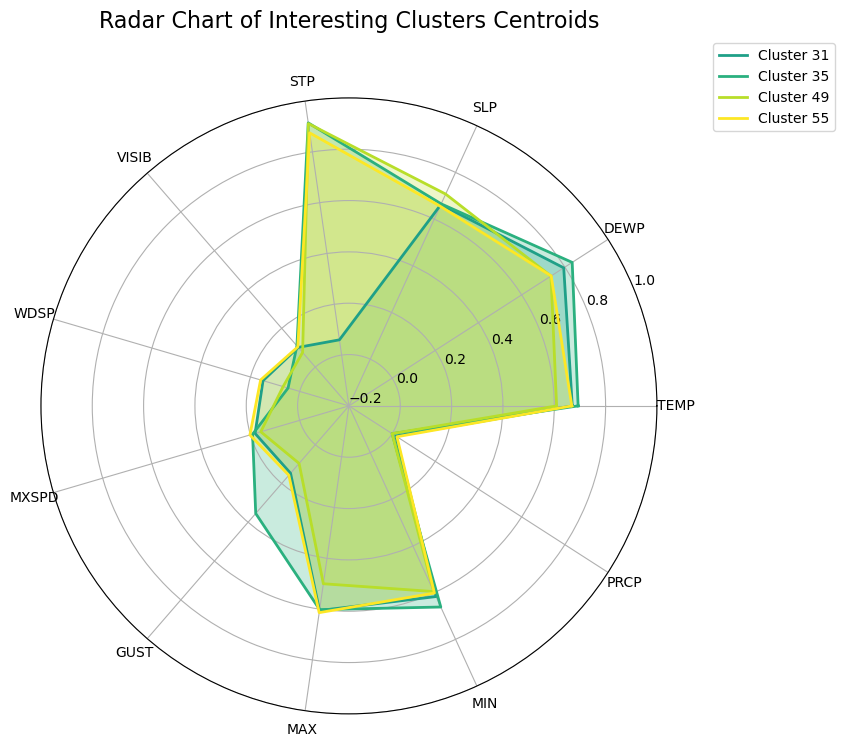

In [ ]:
import math
data = X.drop(['DATE', 'LATITUDE','LONGITUDE'], axis=1)
unique_clusters = sorted(data['cluster'].unique())
if -1 in unique_clusters:
    unique_clusters.remove(-1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data.drop('cluster', axis=1)), columns=data.columns[:-1])
scaled_data['cluster'] = data['cluster']

cluster_centroids = scaled_data.groupby('cluster').mean().reset_index()

num_features = 11

# Function to create radar chart for a single cluster
def create_radar_chart(ax, data_values, feature_names, color, cluster_id):
    angles = [n / float(num_features) * 2 * math.pi for n in range(num_features)]
    angles += angles[:1]
    # print(len(angles))
    # print(len(features))
    data_values = list(data_values)
    data_values += data_values[:1]
    ax.plot(angles, data_values, color=color, linewidth=2, linestyle='solid', label=f'Cluster {cluster_id}')
    ax.fill(angles, data_values, color=color, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)
    ax.set_yticks([-0.2,0,0.2,0.4,0.6,0.8, 1])
    # ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'])
    ax.grid(True)

fig, axes = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

for i, cluster_id in enumerate(unique_clusters):
    if cluster_id not in (31, 55, 49, 35):
        continue
    cluster_data = cluster_centroids[cluster_centroids['cluster'] == cluster_id].drop('cluster', axis=1).values.flatten()
    create_radar_chart(axes, cluster_data, features, colors[i], cluster_id)

axes.set_title('Radar Chart of Interesting Clusters Centroids', size=16, color='black', y=1.1)
axes.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()